# Titanic Dataset: Gaussian Naive Bayes Classifer

In this project, our focus is on the Titanic dataset. Initially, we will conduct an in-depth exploration of the dataset, understanding its structure and characteristics. Next, we aim to apply the Gaussian Naive Bayes classifier to predict whether a passenger survived the tragic sinking of the Titanic. 

Our dataset consists of passenger information, including names, ages, sexes, social-economic classes, and more.

## 1. Import Modules

In [1]:
# Data Science and visualization modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Scikit Learn related methods. Needed to apply logistic regression
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

# Needed to visualize boundaries of logistic regression
from mlxtend.plotting import plot_decision_regions

## 2. Dataset

Using `pandas.DataFrame.head()` we can print first 5 rows of the dataset

In [2]:
# import dataset
df = pd.read_csv('titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


We can display the shape of the DataFrame, revealing the number of rows and columns it contains.

In [3]:
print('Our dataset consist of {} data points and {} columns'.format(df.shape[0], df.shape[1]))

Our dataset consist of 891 data points and 12 columns


As we see above above, certain columns in the dataset contain textual data. However, for our analysis, we do not intend to utilize all of these text-based columns.

we can print columns that contains textual data:

In [4]:
df.select_dtypes(include='object').head()

,Name,Sex,Ticket,Cabin,Embarked
0,"Braund, Mr. Owen Harris",male,A/5 21171,NaN,S
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C85,C
2,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,NaN,S
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,C123,S
4,"Allen, Mr. William Henry",male,373450,NaN,S


Among the available features, we can use the `Sex` and `Embarked` columns by converting their categorical values into numerical representations.

In [5]:
df['Sex'] = df['Sex'].replace(["female", "male"], [0, 1])
df['Embarked'] = df['Embarked'].replace(['S', 'C', 'Q'], [0, 1, 2])

In [6]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,0.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,1.0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,0.0
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,0.0


Now, we can eliminate the remaining columns that contain textual data from our dataset.

In [7]:
# new dataframe with only columns that we gonna use
df_new = df[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked', 'Survived']]

In [8]:
df_new.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,3,1,22.0,1,0,7.2500,0.0,0
1,1,0,38.0,1,0,71.2833,1.0,1
2,3,0,26.0,0,0,7.9250,0.0,1
3,1,0,35.0,1,0,53.1000,0.0,1
4,3,1,35.0,0,0,8.0500,0.0,0


We will now check for the presence of NaN values in our DataFrame. If any NaN values are found, we will remove the corresponding data points.

In [9]:
df_new.isnull().values.any()

True

In [10]:
# remove NaN including data points
df_new = df_new.dropna(axis=0).reset_index(drop=True)

In [11]:
# shape of our new dataframe
df_new.shape

(712, 8)

In [12]:
df_new.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,3,1,22.0,1,0,7.2500,0.0,0
1,1,0,38.0,1,0,71.2833,1.0,1
2,3,0,26.0,0,0,7.9250,0.0,1
3,1,0,35.0,1,0,53.1000,0.0,1
4,3,1,35.0,0,0,8.0500,0.0,0


Now that our dataset is ready, we can start exploring the data. Afterward, we'll apply the Gaussian Naive Bayes classifier to analyze the data and make predictions based on the features we have

## 3.  Exploratory Data Analysis

We can utilize the `pandas.DataFrame.describe()` method to display fundamental statistical information about our DataFrame. This function provides useful summary statistics of the data, giving us a quick overview of its distribution and central tendencies.

In [13]:
df_new.describe()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
count,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000
mean,2.240169,0.636236,29.642093,0.514045,0.432584,34.567251,0.261236,0.404494
std,0.836854,0.481420,14.492933,0.930692,0.854181,52.938648,0.521561,0.491139
min,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,20.000000,0.000000,0.000000,8.050000,0.000000,0.000000
50%,2.000000,1.000000,28.000000,0.000000,0.000000,15.645850,0.000000,0.000000
75%,3.000000,1.000000,38.000000,1.000000,1.000000,33.000000,0.000000,1.000000
max,3.000000,1.000000,80.000000,5.000000,6.000000,512.329200,2.000000,1.000000


By observing the DataFrame, we can deduce that the "age" feature is the only one with continuous values. The other features seem to contain discrete data.

In [14]:
# show last 5 data points
df_new.tail(5)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
707,3,0,39.0,0,5,29.125,2.0,0
708,2,1,27.0,0,0,13.000,0.0,0
709,1,0,19.0,0,0,30.000,0.0,1
710,1,1,26.0,0,0,30.000,1.0,1
711,3,1,32.0,0,0,7.750,2.0,0


We can validate our conclusion by employing the seaborn.pairplot function. This will allow us to create scatter plots for each pair of features in the DataFrame, enabling a visual examination of their relationships and confirming that the "age" feature has continuous values.

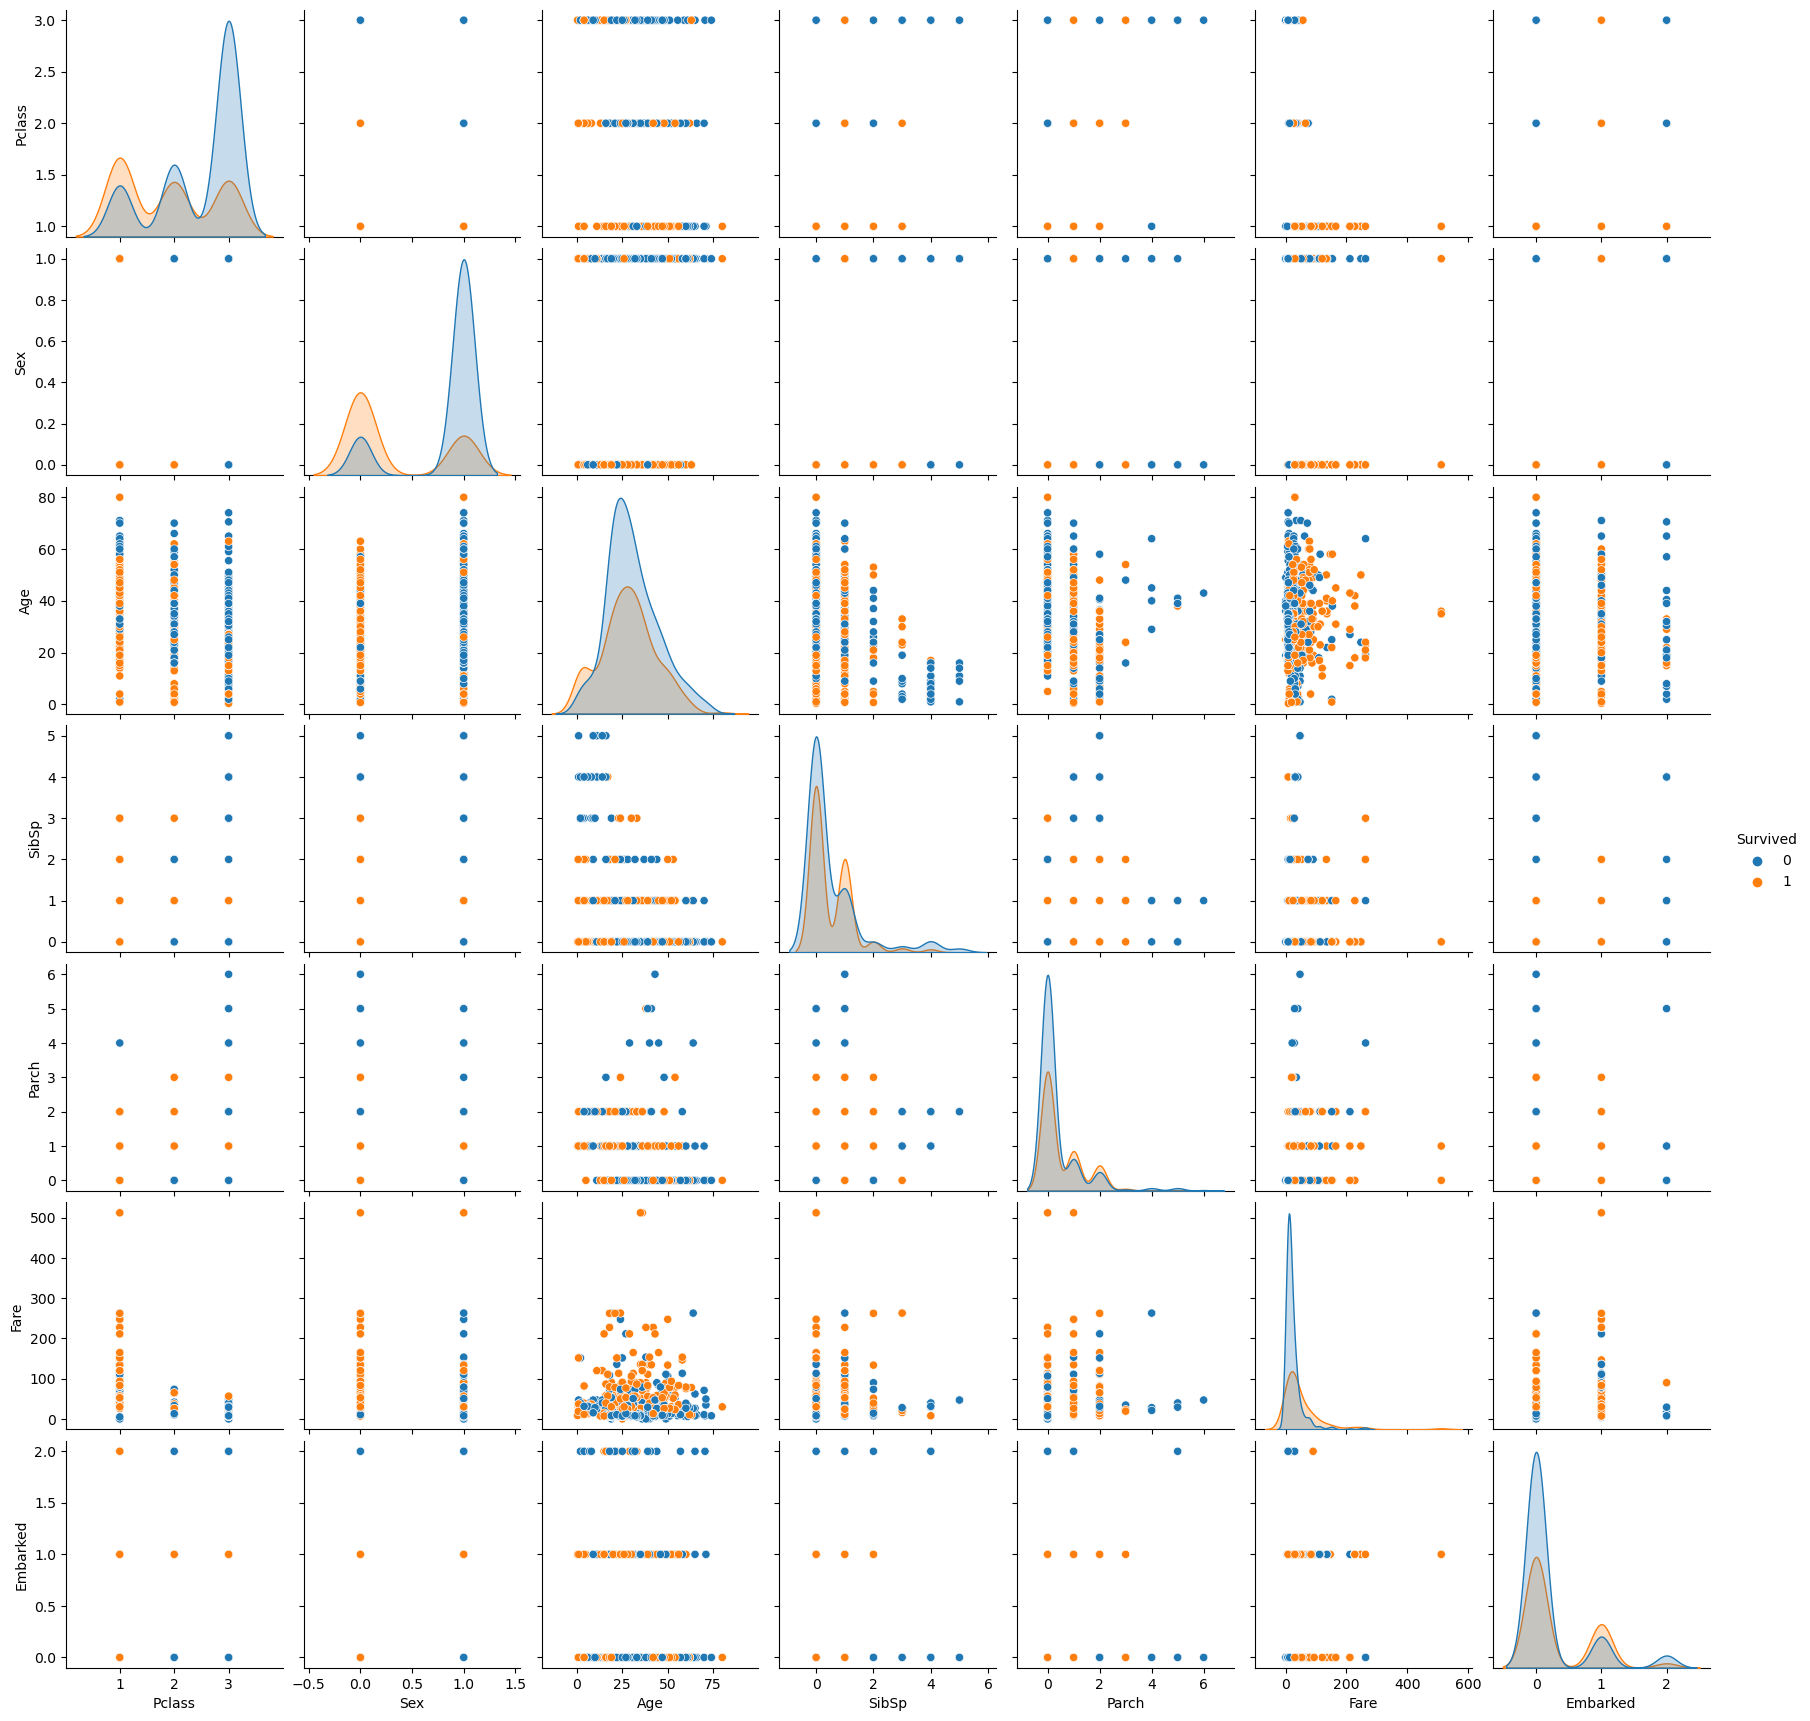

In [15]:
sns.pairplot(df_new, hue='Survived')

Furthermore, for visualizing the data distribution of the "Age" feature, we can utilize seaborn.displot(). 

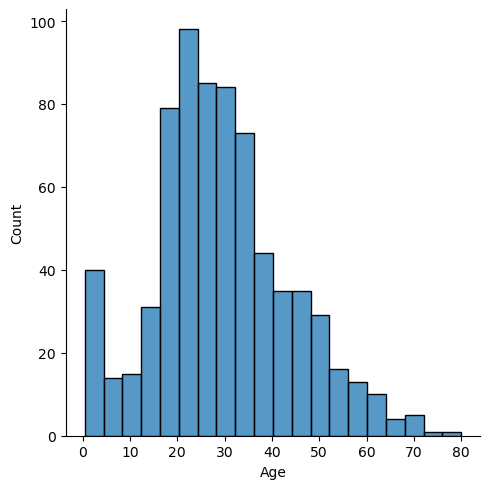

In [16]:
sns.displot(df_new['Age'])

Here, we can observe that the "Age" feature is distributed following a normal distribution.

Next, we will determine which machine learning algorithm to apply. Our goal is to predict whether passengers survived or not, making this a classification task. To select the appropriate classification algorithm, we will start by exploring the correlation matrix. This will help us understand the relationships between different features and guide us in making an informed decision about which algorithm is most suitable for our prediction task.

<Axes: >

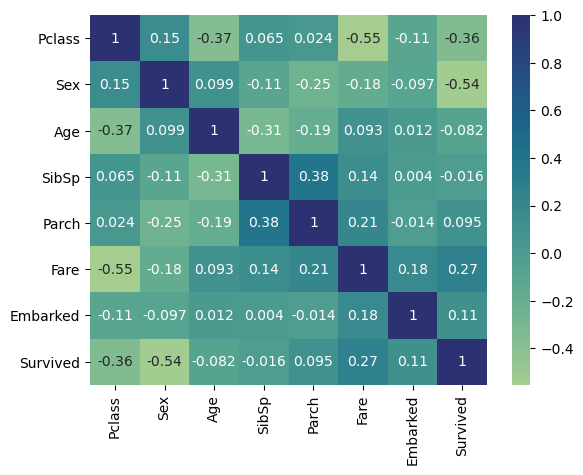

In [17]:
cm = df_new.corr()
sns.heatmap(cm, annot=True, cmap='crest')

Based on the correlation matrix, we can observe that there are no significant correlations between the features, indicating that they are independent of each other. In such classification problems, the Gaussian Naive Bayes classifier becomes an ideal choice. Its ability to handle independent features makes it well-suited for this scenario.

## Gaussian Naive Bayes Classifer

We initiate the process by dividing our data into a training set and a test set.

In [18]:
df_feature = df_new[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]
df_target = df_new['Survived']

X_train, X_test, y_train, y_test = train_test_split(df_feature, df_target, test_size=0.25, 
                                                   random_state=42)

Next, we will proceed with creating the model and initiate the fitting process. 

In [19]:
nb = GaussianNB().fit(X_train, y_train)

Now, we can evaluate the performance of our model using the score method.

In [20]:
print('Training set score: {}'.format(round(nb.score(X_train, y_train), 3)))
print('Test set score: {}'.format(round(nb.score(X_test, y_test), 3)))

Training set score: 0.787
Test set score: 0.753
